In [7]:
import pandas as pd

In [8]:
# Type: pandas DataFrame Object

teams = pd.read_csv("teams.csv")
print(teams)

     team      country  year  events  athletes   age  height  weight  medals  \
0     AFG  Afghanistan  1964       8         8  22.0   161.0    64.2       0   
1     AFG  Afghanistan  1968       5         5  23.2   170.2    70.0       0   
2     AFG  Afghanistan  1972       8         8  29.0   168.3    63.8       0   
3     AFG  Afghanistan  1980      11        11  23.6   168.4    63.2       0   
4     AFG  Afghanistan  2004       5         5  18.6   170.8    64.8       0   
...   ...          ...   ...     ...       ...   ...     ...     ...     ...   
2139  ZIM     Zimbabwe  2000      19        26  25.0   179.0    71.1       0   
2140  ZIM     Zimbabwe  2004      11        14  25.1   177.8    70.5       3   
2141  ZIM     Zimbabwe  2008      15        16  26.1   171.9    63.7       4   
2142  ZIM     Zimbabwe  2012       8         9  27.3   174.4    65.2       0   
2143  ZIM     Zimbabwe  2016      13        31  27.5   167.8    62.2       0   

      prev_medals  prev_3_medals  
0   

In [9]:
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]
print(teams)

     team      country  year  athletes   age  prev_medals  medals
0     AFG  Afghanistan  1964         8  22.0          0.0       0
1     AFG  Afghanistan  1968         5  23.2          0.0       0
2     AFG  Afghanistan  1972         8  29.0          0.0       0
3     AFG  Afghanistan  1980        11  23.6          0.0       0
4     AFG  Afghanistan  2004         5  18.6          0.0       0
...   ...          ...   ...       ...   ...          ...     ...
2139  ZIM     Zimbabwe  2000        26  25.0          0.0       0
2140  ZIM     Zimbabwe  2004        14  25.1          0.0       3
2141  ZIM     Zimbabwe  2008        16  26.1          3.0       4
2142  ZIM     Zimbabwe  2012         9  27.3          4.0       0
2143  ZIM     Zimbabwe  2016        31  27.5          0.0       0

[2144 rows x 7 columns]


In [10]:
teams.select_dtypes(include='number').corr()["medals"]

,medals
year,-0.021603
athletes,0.840817
age,0.025096
prev_medals,0.920048
medals,1.000000


Mathemetical visual, as you'd imagine prev_medals would show the highest correlation to medals

In [11]:
# Graphing lib
import seaborn as sns

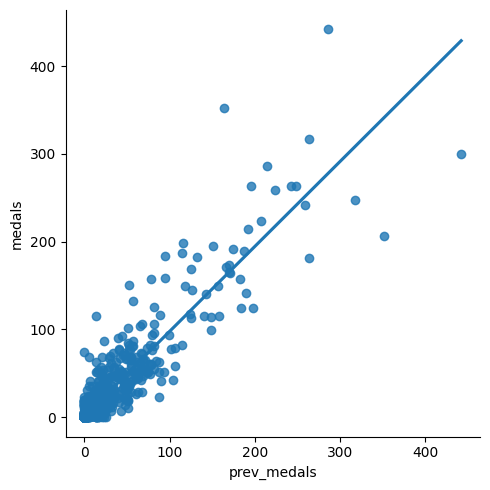

In [12]:
sns.lmplot(x="prev_medals", y="medals", data=teams, fit_reg=True, ci=None)

Correlation seen raw, we can make this better by removing entries with no prev medals (this is because previous medals NaN is not 0, it means maybe they didn't participate so irrelevant to draw from)

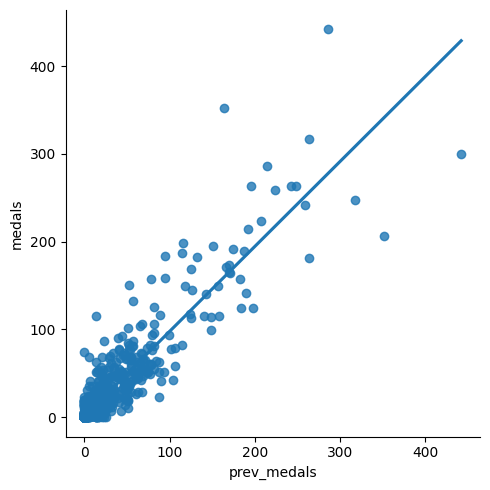

In [13]:
# Remove any blanks (not specific, should be but we just playing around)
teams = teams.dropna()

# Graph it!
sns.lmplot(x="prev_medals", y="medals", data=teams, fit_reg=True, ci=None)

Theoretically better, now we are done with visuals, lets remove some of the last years off the data, we need to do this since we don't wanna train on everything then predict a year(s) it was trained on, think realistically


*   You won't have access to the data of the year you wanna predict, can't time travel buddy.



In [14]:
# DataFrame Object filtering
training_data = teams[teams["year"] < 2012].copy()
test_data = teams[teams["year"] >= 2012].copy()

#Visualize - data sets
print(training_data)
print(test_data)

     team      country  year  athletes   age  prev_medals  medals
0     AFG  Afghanistan  1964         8  22.0          0.0       0
1     AFG  Afghanistan  1968         5  23.2          0.0       0
2     AFG  Afghanistan  1972         8  29.0          0.0       0
3     AFG  Afghanistan  1980        11  23.6          0.0       0
4     AFG  Afghanistan  2004         5  18.6          0.0       0
...   ...          ...   ...       ...   ...          ...     ...
2137  ZIM     Zimbabwe  1992        28  21.2          0.0       0
2138  ZIM     Zimbabwe  1996        21  23.8          0.0       0
2139  ZIM     Zimbabwe  2000        26  25.0          0.0       0
2140  ZIM     Zimbabwe  2004        14  25.1          0.0       3
2141  ZIM     Zimbabwe  2008        16  26.1          3.0       4

[1609 rows x 7 columns]
     team      country  year  athletes   age  prev_medals  medals
6     AFG  Afghanistan  2012         6  24.8          1.0       1
7     AFG  Afghanistan  2016         3  24.7       

In [15]:
# Visualize - Returns row x columns
print("training data shape -> " + str(training_data.shape))
print("test data shape -> " + str(test_data.shape))

training data shape -> (1609, 7)
test data shape -> (405, 7)


In [16]:
# Import linear regression algorithm from scikit-learn
from sklearn.linear_model import LinearRegression

In [17]:
# Initialize linear regression class, and cols to use to predict, and the target val we are predicting
regression = LinearRegression()
predictors = ["athletes", "prev_medals"]
target = "medals"

In [18]:
regression.fit(training_data[predictors], training_data["medals"])

LinearRegression()

In [19]:
predictions = regression.predict(test_data[predictors])
print(predictions)

[-9.61221245e-01 -1.17633261e+00 -1.42503158e+00 -1.71184673e+00
  2.15562926e+00  3.91463636e+00 -1.71184673e+00 -1.85525431e+00
  3.67563128e-01 -2.77770967e-01 -1.85525431e+00 -1.49673537e+00
  4.67519911e+01  2.87550937e+01  4.58450091e+00  2.54773581e+00
 -1.85525431e+00 -1.64014295e+00 -1.85525431e+00 -1.85525431e+00
  1.46556876e+02  1.20571799e+02  6.56314795e+00  3.95275254e+00
  7.34283247e+00  1.03117468e+01  5.19171882e+00  3.58517645e+00
 -1.64014295e+00 -1.64014295e+00 -1.56843916e+00 -1.20992022e+00
 -1.71184673e+00 -1.42503158e+00  1.17929959e+01  1.00049298e+01
 -1.78355052e+00 -1.71184673e+00 -1.56843916e+00 -1.56843916e+00
 -1.99866189e+00 -1.99866189e+00 -1.56843916e+00 -1.35332779e+00
 -1.92695810e+00 -1.92695810e+00  3.28912706e+01  2.53042547e+01
 -1.78355052e+00 -1.28162400e+00 -1.85525431e+00 -3.87590939e-01
  7.83480779e+01  8.39481430e+01 -1.13821643e+00  9.74781040e-01
 -1.92695810e+00 -1.92695810e+00  6.98884211e+00  3.51800124e+00
 -1.78355052e+00 -1.78355

As you imagine, hard to read. It doesn't know how we cant have negative or decimal medals. Let's manually touch this up

In [20]:
# Let's add this predictions MADE FROM TRAIN DATA to our test data as a column
test_data["predictions"] = predictions

print(test_data)

     team      country  year  athletes   age  prev_medals  medals  predictions
6     AFG  Afghanistan  2012         6  24.8          1.0       1    -0.961221
7     AFG  Afghanistan  2016         3  24.7          1.0       0    -1.176333
24    ALB      Albania  2012        10  25.7          0.0       0    -1.425032
25    ALB      Albania  2016         6  23.7          0.0       0    -1.711847
37    ALG      Algeria  2012        39  24.8          2.0       1     2.155629
...   ...          ...   ...       ...   ...          ...     ...          ...
2111  YEM        Yemen  2016         3  19.3          0.0       0    -1.926958
2131  ZAM       Zambia  2012         7  22.6          0.0       0    -1.640143
2132  ZAM       Zambia  2016         7  24.1          0.0       0    -1.640143
2142  ZIM     Zimbabwe  2012         9  27.3          4.0       0     1.505767
2143  ZIM     Zimbabwe  2016        31  27.5          0.0       0     0.080748

[405 rows x 8 columns]


In [21]:
# If negative, just make a 0 - this is specific to our real life case
# Round decimals
test_data.loc[test_data["predictions"] < 0, "predictions"] = 0
test_data["predictions"] = test_data["predictions"].round()

# Visualize - clean
print(test_data)

     team      country  year  athletes   age  prev_medals  medals  predictions
6     AFG  Afghanistan  2012         6  24.8          1.0       1          0.0
7     AFG  Afghanistan  2016         3  24.7          1.0       0          0.0
24    ALB      Albania  2012        10  25.7          0.0       0          0.0
25    ALB      Albania  2016         6  23.7          0.0       0          0.0
37    ALG      Algeria  2012        39  24.8          2.0       1          2.0
...   ...          ...   ...       ...   ...          ...     ...          ...
2111  YEM        Yemen  2016         3  19.3          0.0       0          0.0
2131  ZAM       Zambia  2012         7  22.6          0.0       0          0.0
2132  ZAM       Zambia  2016         7  24.1          0.0       0          0.0
2142  ZIM     Zimbabwe  2012         9  27.3          4.0       0          2.0
2143  ZIM     Zimbabwe  2016        31  27.5          0.0       0          0.0

[405 rows x 8 columns]


Now, let's look into our mean absolute error. Essentially, from our predictions how off is it ON AVERAGE, because there are many predictions to compare, whats the average difference between prediction, and actuality (this is why we have test data)

In [22]:
from sklearn.metrics import mean_absolute_error

# Please remember the test_data predictions were made from the training_data and we added it as column for ease
error = mean_absolute_error(test_data["medals"], test_data["predictions"])

print(error)

3.2987654320987656


In [23]:
# Let's check if our error is lower than standard deviation - BASIC sanity check
teams.describe()["medals"]

,medals
count,2014.000000
mean,10.990070
std,33.627528
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,442.000000


Now we can look country by country.

In [24]:
# USA
print(test_data[test_data["team"] == "USA"])

     team        country  year  athletes   age  prev_medals  medals  \
2053  USA  United States  2012       689  26.7        317.0     248   
2054  USA  United States  2016       719  26.4        248.0     264   

      predictions  
2053        285.0  
2054        236.0  


In [25]:
# All with just a bit less cols
print(test_data[["country", "year", "medals", "predictions"]])

          country  year  medals  predictions
6     Afghanistan  2012       1          0.0
7     Afghanistan  2016       0          0.0
24        Albania  2012       0          0.0
25        Albania  2016       0          0.0
37        Algeria  2012       1          2.0
...           ...   ...     ...          ...
2111        Yemen  2016       0          0.0
2131       Zambia  2012       0          0.0
2132       Zambia  2016       0          0.0
2142     Zimbabwe  2012       0          2.0
2143     Zimbabwe  2016       0          0.0

[405 rows x 4 columns]


Now let's look into the errors a bit specifically, we have many countries, over many years, let's look into the average error margin we have by country overall, taking in all the years data we have.

In [26]:
gen_errors = (test_data["medals"] - test_data["predictions"]).abs()

# Calculate mean error by calculate seperate group by each team, then find mean error within
error_by_country = gen_errors.groupby(test_data["team"]).mean()

print(error_by_country)

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64


That's the number of how much it was off by, but this doesn't provide **REAL CONTEXT**

* Being off by 3 in a comparison like 248-251 is **NOT the same** as being off by 2 in something like 2-5.

In [27]:
medals_by_country = test_data["medals"].groupby(test_data["team"]).mean()
error_ratio = error_by_country / medals_by_country

print(error_ratio)

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64


In [28]:
# You have to remember there may be 0s, so can get NaN or infinity
import numpy as np

error_ratio = error_ratio[np.isfinite(error_ratio)]
print(error_ratio)

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64


This varies alot, why? You have to again consider our data, 1 predicted 2 earned that's a 100% error margin, even though in practice not a crazy prediction. We see USA (higher medal count country) with a lower margin, you can again imagine why in application. Thus, you need to take into account your situation but also the literal values here as well.

**That being said** - Higher number of medals, we see more accuracy

# Final Takeaways

### Let's show by lowest ratio (so most accurate), and you can see this phenomena

In [29]:
# Create summary with medals, predictions, and error_ratio
summary = test_data.groupby("team").agg({
    "medals": "mean",
    "predictions": "mean"
})

# Add error_ratio and drop NaN rows, we hadn't added it to test_data yet
summary["error_ratio"] = error_ratio
summary = summary.dropna()

# Sort by error_ratio and display
summary.sort_values("error_ratio")[["medals", "predictions", "error_ratio"]]

,medals,predictions,error_ratio
team,,,
FRA,89.0,91.0,0.022472
CAN,62.0,59.0,0.048387
NZL,31.5,29.5,0.063492
RUS,127.5,138.0,0.082353
ITA,70.0,67.5,0.121429
...,...,...,...
MAR,1.0,3.0,2.000000
EGY,2.5,8.5,2.400000
HKG,0.5,2.0,3.000000


This excludes the NaN infinite one. Data we can actually inspect. Alright I'm ready send me to OpenAI.